In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, RocCurveDisplay
from time import time

In [6]:
# Load the dataset
dataset = pd.read_csv('FinalDataset.csv')

# Peek at the dataset
print(dataset.head())

# Explore Features
print(dataset.info())

# See the distribution of our target variable
print(dataset['Class'].value_counts())

# Get an idea about the actual data distribution
pd.options.display.float_format = '{:20,.3f}'.format
print(dataset.describe())

# Check whether there are null values
null_columns = dataset.columns[dataset.isna().any()].tolist()
print("Columns with null values:", null_columns)

# Fill any null values with the mean value of that feature
dataset['MI_dir_L5_weight'] = dataset['MI_dir_L5_weight'].fillna(dataset['MI_dir_L5_weight'].mean())

# Check for duplicates
duplicates = dataset[dataset.duplicated()]
print(duplicates.count())

# Keep the first occurrence
dataset = dataset.drop_duplicates()

   MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000            74.0        0.000000e+00          1.000000   
1          1.995653            74.0        0.000000e+00          1.997390   
2          2.984032            74.0        0.000000e+00          2.990403   
3          3.952494            74.0        0.000000e+00          3.971399   
4          4.931439            74.0        9.090000e-13          4.958692   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0            74.0        0.000000e+00          1.000000            74.0   
1            74.0        1.820000e-12          1.999129            74.0   
2            74.0        1.820000e-12          2.996795            74.0   
3            74.0        1.820000e-12          3.990434            74.0   
4            74.0        1.820000e-12          4.986173            74.0   

   MI_dir_L1_variance  MI_dir_L0.1_weight  ...  HpHp_L0.1_covariance  \
0        0.000

In [7]:
# Split the dataset into features and target variable
X = dataset.drop('Class', axis=1)
y = dataset['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k-NN Accuracy: 0.999644128113879
k-NN Precision: 0.9996443933435314
k-NN Recall: 0.999644128113879
k-NN Confusion Matrix:
[[5363    0]
 [   4 5873]]


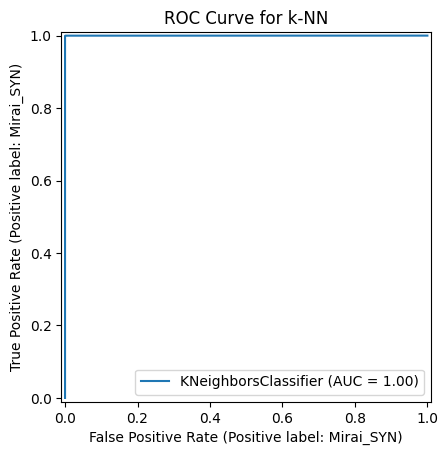

In [8]:
# Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the k-NN model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate k-NN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
confusion_knn = confusion_matrix(y_test, y_pred_knn)

print(f'k-NN Accuracy: {accuracy_knn}')
print(f'k-NN Precision: {precision_knn}')
print(f'k-NN Recall: {recall_knn}')
print('k-NN Confusion Matrix:')
print(confusion_knn)

# Plot the ROC curve for k-NN
RocCurveDisplay.from_estimator(knn, X_test, y_test)
plt.title('ROC Curve for k-NN')
plt.show()

Decision Tree Accuracy: 0.9999110320284698
Decision Tree Precision: 0.9999110486145941
Decision Tree Recall: 0.9999110320284698
Decision Tree Confusion Matrix:
[[5363    0]
 [   1 5876]]


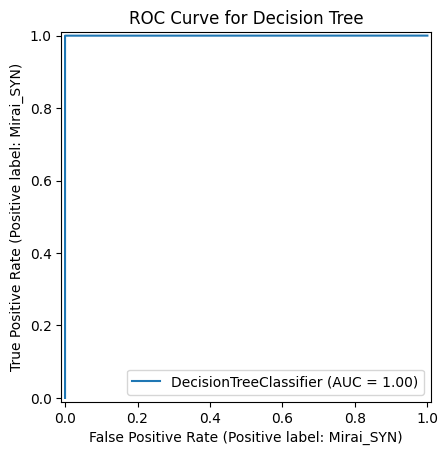

In [9]:
# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
confusion_dt = confusion_matrix(y_test, y_pred_dt)

print(f'Decision Tree Accuracy: {accuracy_dt}')
print(f'Decision Tree Precision: {precision_dt}')
print(f'Decision Tree Recall: {recall_dt}')
print('Decision Tree Confusion Matrix:')
print(confusion_dt)

# Plot the ROC curve for Decision Tree
RocCurveDisplay.from_estimator(dt, X_test, y_test)
plt.title('ROC Curve for Decision Tree')
plt.show()

Best parameters: {'max_depth': 3, 'max_features': None, 'min_samples_split': 2, 'splitter': 'best'}
Tuned Decision Tree Accuracy: 0.9999110320284698
Tuned Decision Tree Precision: 0.9999110486145941
Tuned Decision Tree Recall: 0.9999110320284698
Tuned Decision Tree Confusion Matrix:
[[5363    0]
 [   1 5876]]


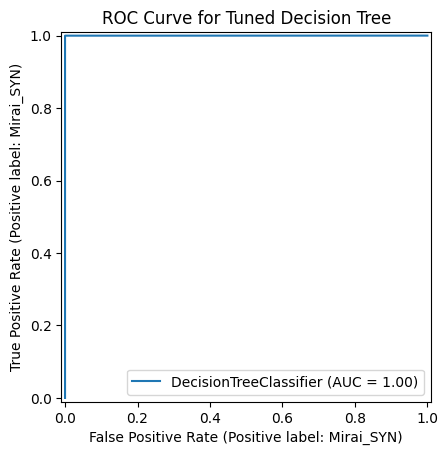

In [11]:
# Hyperparameter Tuning for Decision Tree
param_grid = {
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']  # Removed 'auto'
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Train the Decision Tree model with the best parameters
dt_best = DecisionTreeClassifier(**best_params, random_state=42)
dt_best.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred_dt_best = dt_best.predict(X_test)

# Evaluate the tuned Decision Tree model
accuracy_dt_best = accuracy_score(y_test, y_pred_dt_best)
precision_dt_best = precision_score(y_test, y_pred_dt_best, average='weighted')
recall_dt_best = recall_score(y_test, y_pred_dt_best, average='weighted')
confusion_dt_best = confusion_matrix(y_test, y_pred_dt_best)

print(f'Tuned Decision Tree Accuracy: {accuracy_dt_best}')
print(f'Tuned Decision Tree Precision: {precision_dt_best}')
print(f'Tuned Decision Tree Recall: {recall_dt_best}')
print('Tuned Decision Tree Confusion Matrix:')
print(confusion_dt_best)

# Plot the ROC curve for tuned Decision Tree
RocCurveDisplay.from_estimator(dt_best, X_test, y_test)
plt.title('ROC Curve for Tuned Decision Tree')
plt.show()

In [12]:
# Compare results with k-NN
print("Comparison of k-NN and Decision Tree:")
print(f'k-NN Accuracy: {accuracy_knn}')
print(f'Decision Tree Accuracy: {accuracy_dt}')
print(f'Tuned Decision Tree Accuracy: {accuracy_dt_best}')
print(f'k-NN Precision: {precision_knn}')
print(f'Decision Tree Precision: {precision_dt}')
print(f'Tuned Decision Tree Precision: {precision_dt_best}')
print(f'k-NN Recall: {recall_knn}')
print(f'Decision Tree Recall: {recall_dt}')
print(f'Tuned Decision Tree Recall: {recall_dt_best}')

Comparison of k-NN and Decision Tree:
k-NN Accuracy: 0.999644128113879
Decision Tree Accuracy: 0.9999110320284698
Tuned Decision Tree Accuracy: 0.9999110320284698
k-NN Precision: 0.9996443933435314
Decision Tree Precision: 0.9999110486145941
Tuned Decision Tree Precision: 0.9999110486145941
k-NN Recall: 0.999644128113879
Decision Tree Recall: 0.9999110320284698
Tuned Decision Tree Recall: 0.9999110320284698


In [ ]:
# Lab 6: Using Machine Learning for Intrusion Detection

## Introduction
Provide a brief introduction to the lab. Mention the significance of machine learning in network security, specifically in intrusion detection.

## Objectives
State the objectives of the lab, which include:
- Understanding basic machine learning concepts for classifying traffic samples.
- Implementing and evaluating a k-NN algorithm for intrusion detection.
- Comparing the performance of k-NN with Decision Trees.

## Methodology

### Environment Setup
Detail the environment setup required for the lab, including the installation of Python, Jupyter Notebook, and necessary libraries.

### Dataset Description
Provide a brief description of the dataset (FinalDataset.csv) used in the lab, which contains benign and malicious samples of an IoT device.

### Data Preprocessing
Include the code for loading and preprocessing the dataset.

### Fit and evaluate a KNN model with default values and use 5-fold Cross-Validation
Include code snippets and results for k-NN.

### Fit and evaluate a Decision Tree model with default values and use 5-fold Cross-Validation
Include code snippets and results for DT.

### Perform hyperparameter tuning using GridSearchCV for Decision Tree
Include code snippets and results for hyperparameter tuning.

### Compare k-NN and Decision Tree Models
Present the results obtained from both implementations.

### Discussion
Discuss the implications of the results. Address the following points:
- How well did each model perform in classifying benign and malicious traffic?
- Which algorithm performed better and why?
- Potential improvements or alternative approaches.

### Conclusion
Summarize the key findings from the lab. Reiterate the importance of machine learning in intrusion detection and how the lab has enhanced your understanding of these concepts.

### References